In [13]:
#Question1

# 1. All models are wrong but some are useful : we can not simulate our natural or engineering environment very correctly by our artificial models, so all models are wrong,
#                                               But we can approximately calculated the real situations with our models which can help us predict true situtations and also know what elements should be noticed when we simulate our models. So This should be very useful.
#                                               Such as Ideal Gas Law PV = nRT, this can provide useful information about ideal gas, but actually gas in our environment is not ideal. Gas are affected by other environmental factors. But we can approximately predict the gas information from Ideal Gas Law.



# 2.A model get right answer but for wrong reason : we can get the correct answer from our model and this will happen especially when you do single calculation 
#                                                     But after trend check, we can find the trend trained by model is not correctly followed our real data.  
    

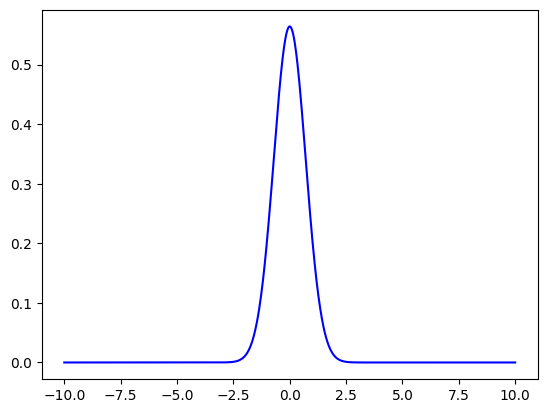

In [14]:
# Question2 


import numpy as np 
import matplotlib.pyplot as plt
import scipy.interpolate as si

def f(x):
    return np.exp(-x**2)/ np.sqrt(np.pi)


x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, c="b", label="Gaus")

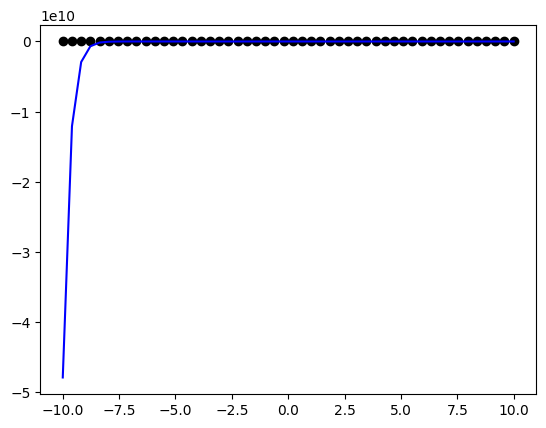

In [15]:
# For this case, can not use lagrange interpolation method, it will cause  oscillate strongly between data point
# Can not fit well especially in high-degree polynomials. But we can find alternative ways to solve this problems

xi  = np.linspace(-10, 10, 50)
yi = f(xi)
lp = si.lagrange(xi, yi)
plt.plot(xi, f(xi), 'ko', label='Runge function')
plt.plot(xi, lp(xi), c="b", label="Gaus")


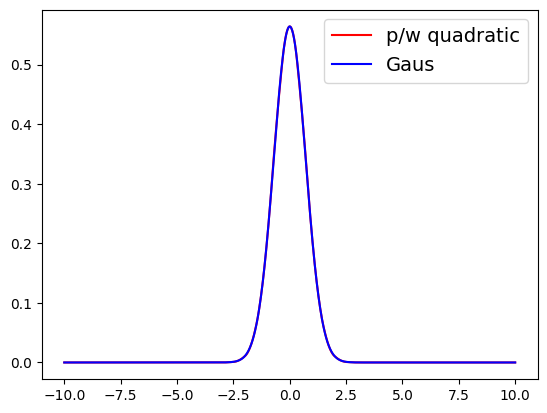

In [83]:
# But we can fit well with Piecewise polynomial interpolation.
# we can split the data into pieces and fit a lower degree polynomial through each of these.
xi = np.linspace(-10, 10, 71)
yi = f(xi)
x = np.linspace(-10, 10, 1000)

# initialise the value of our interpolant at x to zero
q2 = np.zeros_like(x)

for i in range(1, len(xi), 2):
    q1 = np.polyfit(xi[i - 1:i + 2], yi[i - 1:i + 2], 2)
    q2 += np.polyval(q1, x) * (x >= xi[i - 1]) * (x <= xi[i + 1])
plt.plot(x, q2, 'r', label='p/w quadratic')
plt.plot(x, y, c="b", label="Gaus")
plt.legend(loc='best', fontsize=14)

In [86]:
#There are three ways to calculate the area integration of our function, MidPoint rule ,Trapezoidal rule and Simpson's rule.
#From this problem , due to the function is smooth curve, it is suitable to use Simpson's rule which is uses quadratic approximations instead of linear approximations
#for Midpoint and Trapezoidal rule which are used linear appromixation are not suitable for smooth curve. The error will be larger than Simpson's rule 

#For this case, should use Simpson's Rule
number_intervals = 20

xi = np.linspace(-10, 10, number_intervals+1)

area_S, area_T, area_M = 0.0, 0.0, 0.0

def calculate_area(xi, number_intervals):
    area_S, area_T, area_M = 0.0, 0.0, 0.0
    for i in range(number_intervals):
        area_S += ((abs(xi[i+1] - xi[i]))/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))
        area_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])
        area_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])
    return area_S , area_T, area_M

area_S , area_T, area_M = calculate_area(xi, number_intervals)

print("error for Simpson's rule {:.8f}" .format(abs(1 - area_S)* 100))
print("error for Midpoint rule {:.8f}" .format(abs(1 - area_M)* 100))
print("error for Trapezoidal rule {:.8f}" .format(abs(1 - area_T)* 100))



error for Simpson's rule 0.00344821
error for Midpoint rule 0.01034464
error for Trapezoidal rule 0.01034464


In [91]:
#There are three ways to calculate the area integration of our function, MidPoint rule ,Trapezoidal rule and Simpson's rule.
#From this problem , due to the function is smooth curve, it is suitable to use Simpson's rule which is uses quadratic approximations instead of linear approximations
#for Midpoint and Trapezoidal rule which are used linear appromixation are not suitable for smooth curve. The error will be larger than Simpson's rule 

#For this case, should use Simpson's Rule
import math 
number_intervals = 20

xi = np.linspace(-math.inf, math.inf, number_intervals+1)

area_S, area_T, area_M = 0.0, 0.0, 0.0

def calculate_area(xi, number_intervals):
    area_S, area_T, area_M = 0.0, 0.0, 0.0
    for i in range(number_intervals):
        area_S += ((abs(xi[i+1] - xi[i]))/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))
        area_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])
        area_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])
    return area_S , area_T, area_M

area_S , area_T, area_M = calculate_area(xi, number_intervals)

print("error for Simpson's rule {:.8f}" .format(abs(1 - area_S)* 100))
print("error for Midpoint rule {:.8f}" .format(abs(1 - area_M)* 100))
print("error for Trapezoidal rule {:.8f}" .format(abs(1 - area_T)* 100))

error for Simpson's rule nan
error for Midpoint rule nan
error for Trapezoidal rule nan


/opt/homebrew/Caskroom/miniconda/base/envs/ese-msc/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/homebrew/Caskroom/miniconda/base/envs/ese-msc/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


[3.76125389e+05 9.40305973e+04 4.70147986e+04 2.35068993e+04
 1.17529497e+04 5.87597483e+03 1.87963195e+03 1.87063195e+02]
[1.00000000e+00 2.82093792e+05 1.41046396e+05 7.05226979e+04
 3.52608490e+04 1.76299245e+04 5.64089584e+03 5.63189584e+02]
[5.64188584e+05 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]


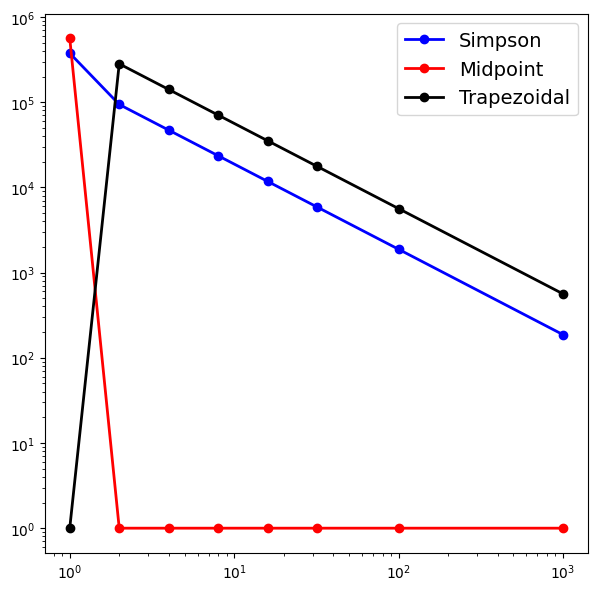

In [90]:
interval_sizes= [1, 2, 4, 8, 16, 32, 100, 1000]
errors_M = np.zeros_like(interval_sizes, dtype='float64')
errors_S = np.zeros_like(interval_sizes, dtype='float64')
errors_T = np.zeros_like(interval_sizes, dtype='float64')

area_S, area_T, area_M = 0.0, 0.0, 0.0

def calculate_area_1(xi, number_intervals):
    area_S, area_T, area_M = 0.0, 0.0, 0.0
    xi = np.linspace(-500000, 500000, number_intervals+1)
    for i in range(number_intervals):
        area_S += ((abs(xi[i+1] - xi[i]))/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))
        area_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])
        area_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])
    return area_S , area_T, area_M

for (i, number_intervals) in enumerate(interval_sizes):
    number_intervals = number_intervals
    area_S , area_T, area_M = calculate_area_1(xi, number_intervals)
    errors_S[i] = abs(area_S-1)
    errors_T[i] = abs(area_T-1)
    errors_M[i] = abs(area_M-1)

print(errors_S)
print(errors_T)
print(errors_M)
    
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes, errors_S, 'bo-', lw=2, label='Simpson')
ax1.loglog(interval_sizes, errors_M, 'ro-', lw=2, label='Midpoint')
ax1.loglog(interval_sizes, errors_T, 'ko-', lw=2, label='Trapezoidal')
ax1.legend(loc='best', fontsize=14)